In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/global-spice-consumption/Export.csv


In [2]:
# Load the data
data = pd.read_csv("/kaggle/input/global-spice-consumption/Export.csv")
data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Item Code (CPC),Item,Year,Unit,Import,Export,Production,Consumption
0,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2014,t,283.85,21099.0,21500.00,684.85
1,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2015,t,1000.16,17340.0,18000.00,1660.16
2,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2016,t,814.88,8353.0,17333.33,9795.21
3,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2017,t,3.67,8500.0,18234.12,9737.79
4,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2018,t,112.30,9456.0,17855.82,8512.12


# Exploring the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45321 entries, 0 to 45320
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Domain Code      45321 non-null  object 
 1   Domain           45321 non-null  object 
 2   Area Code (M49)  45321 non-null  int64  
 3   Area             45321 non-null  object 
 4   Element Code     45321 non-null  int64  
 5   Item Code (CPC)  45321 non-null  int64  
 6   Item             45321 non-null  object 
 7   Year             45321 non-null  int64  
 8   Unit             45321 non-null  object 
 9   Import           45321 non-null  float64
 10  Export           45321 non-null  float64
 11  Production       45321 non-null  float64
 12  Consumption      45321 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 4.5+ MB


# **Fields and Data Types 🗒️**  
Global Spice Consumption dataset including information about imports, exports, production, and consumption of various food and commodity items across countries and regions over the years. This data is useful for analyzing global food trends and trade activities. 

## **Data Dictionary**  

| **Parameter**         | **Description**                                                                                                                                              |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `Domain Code`         | Unique code representing the domain or sector (e.g., agriculture, food).                                                                                      |
| `Domain`              | Name of the domain or sector to which the record belongs (e.g., Agriculture).                                                                                |
| `Area Code (M49)`     | Numerical code based on the UN M49 standard representing a geographic area or country.                                                                        |
| `Area`                | Name of the country or region associated with the record.                                                                                                     |
| `Element Code`        | Code representing the statistical element (e.g., production, import quantity, consumption).                                                                   |
| `Item Code (CPC)`     | Code based on the Central Product Classification (CPC) representing the product or commodity.                                                                 |
| `Item`                | Name of the food or commodity item (e.g., Wheat, Rice, Milk).                                                                                                 |
| `Year`                | The calendar year in which the data was recorded.                                                                                                             |
| `Unit`                | Measurement unit of the data values (e.g., tonnes, kilograms).                                                                                                |
| `Import`              | Quantity of the item imported in the specified year and area.                                                                                                 |
| `Export`              | Quantity of the item exported in the specified year and area.                                                                                                 |
| `Production`          | Quantity of the item produced domestically in the specified year and area.                                                                                    |
| `Consumption`         | Quantity of the item consumed in the specified year and area, often derived from production + import - export.                                                |



# Understanding Data

In [4]:
# Display the dimensions of the dataset
data.shape

(45321, 13)

In [5]:
# Display descriptive statistics of the dataset
data.describe()

,Area Code (M49),Element Code,Item Code (CPC),Year,Import,Export,Production,Consumption
count,45321.000000,45321.0,45321.000000,45321.000000,4.532100e+04,4.532100e+04,4.532100e+04,4.532100e+04
mean,422.784824,5610.0,1611.224333,2009.062267,2.979475e+03,3.304097e+03,3.088251e+04,3.055789e+04
std,252.530226,0.0,128.138020,8.784068,2.463151e+04,3.111707e+04,4.981218e+05,4.939798e+05
min,4.000000,5610.0,1231.000000,1993.000000,0.000000e+00,0.000000e+00,0.000000e+00,-5.009568e+04
25%,203.000000,5610.0,1652.000000,2002.000000,3.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
50%,410.000000,5610.0,1654.000000,2009.000000,5.090000e+01,1.000000e+00,0.000000e+00,8.223000e+01
75%,642.000000,5610.0,1656.000000,2017.000000,5.396500e+02,7.480000e+01,0.000000e+00,1.113050e+03
max,894.000000,5610.0,1658.000000,2023.000000,1.334022e+06,1.220169e+06,1.734695e+07,1.732090e+07


In [6]:
# Display column names of the dataset
data.columns.values

array(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Item Code (CPC)', 'Item', 'Year', 'Unit', 'Import', 'Export ',
       'Production', 'Consumption'], dtype=object)

In [7]:
# Renames the dataset and removes spaces in column names
data = data.rename(columns={
    "Domain Code": "Domain_Code",
    "Area Code (M49)": "Area_Code",
    "Element Code": "Element_Code",
    "Item Code (CPC)": "Item_Code",
    "Export ": "Export"
})

# Display the first few rows of the dataset to verify the changes
data.head()

,Domain_Code,Domain,Area_Code,Area,Element_Code,Item_Code,Item,Year,Unit,Import,Export,Production,Consumption
0,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2014,t,283.85,21099.0,21500.00,684.85
1,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2015,t,1000.16,17340.0,18000.00,1660.16
2,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2016,t,814.88,8353.0,17333.33,9795.21
3,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2017,t,3.67,8500.0,18234.12,9737.79
4,TCL,Crops and livestock products,4,Afghanistan,5610,1654,"Anise, badian, coriander, cumin, caraway, fenn...",2018,t,112.30,9456.0,17855.82,8512.12


In [8]:
# Count the ocurrences of each Items in the dataset
data.Item.value_counts()

Item
Pepper (Piper spp.), raw                                                     5625
Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw    5261
Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw                 5227
Cinnamon and cinnamon-tree flowers, raw                                      5060
Nutmeg, mace, cardamoms, raw                                                 5016
Ginger, raw                                                                  4938
Cloves (whole stems), raw                                                    4887
Vanilla, raw                                                                 4686
Chillies and peppers, green (Capsicum spp. and Pimenta spp.)                 4621
Name: count, dtype: int64

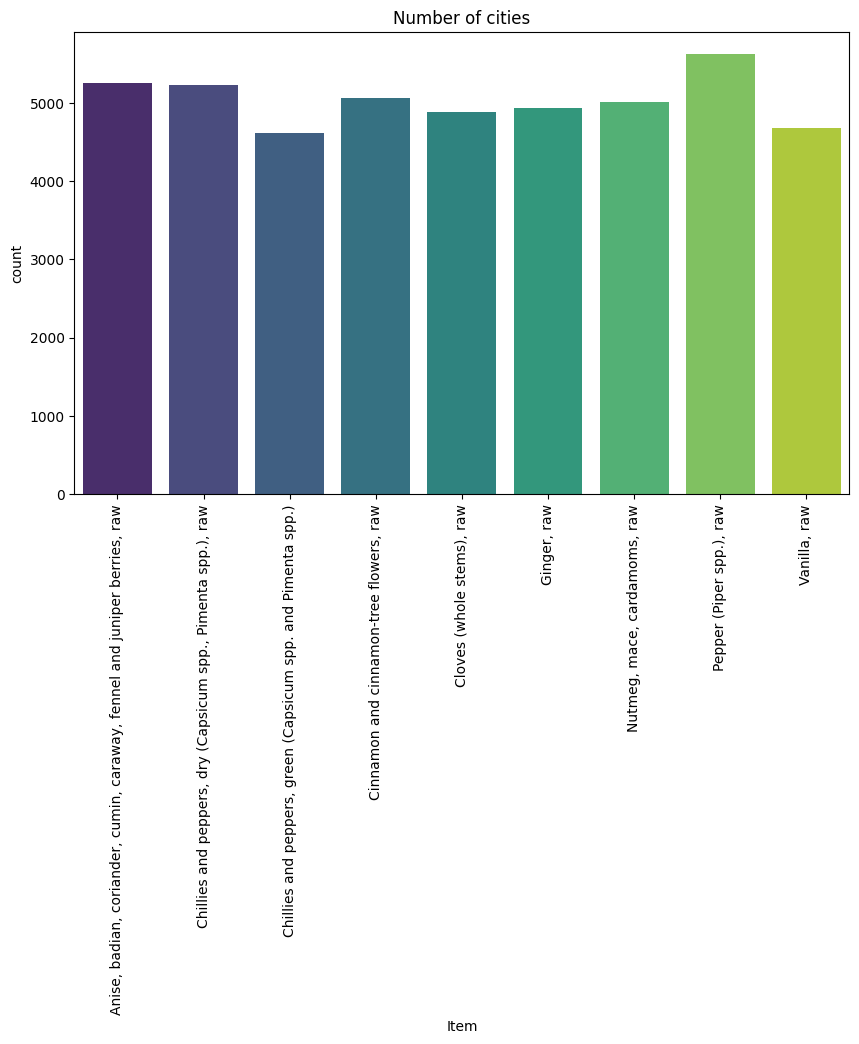

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='Item',data=data, palette='viridis')
plt.xticks(rotation=90)
plt.title("Number of cities")
plt.show()

## Now i going to checking the number of unique values in each column

In [10]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Domain_Code,1
Domain,1
Area_Code,199
Area,199
Element_Code,1
Item_Code,9
Item,9
Year,31
Unit,1
Import,16238


# Missing values

In [11]:
# Check for missing values
print(data.isnull().sum())

Domain_Code     0
Domain          0
Area_Code       0
Area            0
Element_Code    0
Item_Code       0
Item            0
Year            0
Unit            0
Import          0
Export          0
Production      0
Consumption     0
dtype: int64


# EDA (Exploratory Data Analysis)

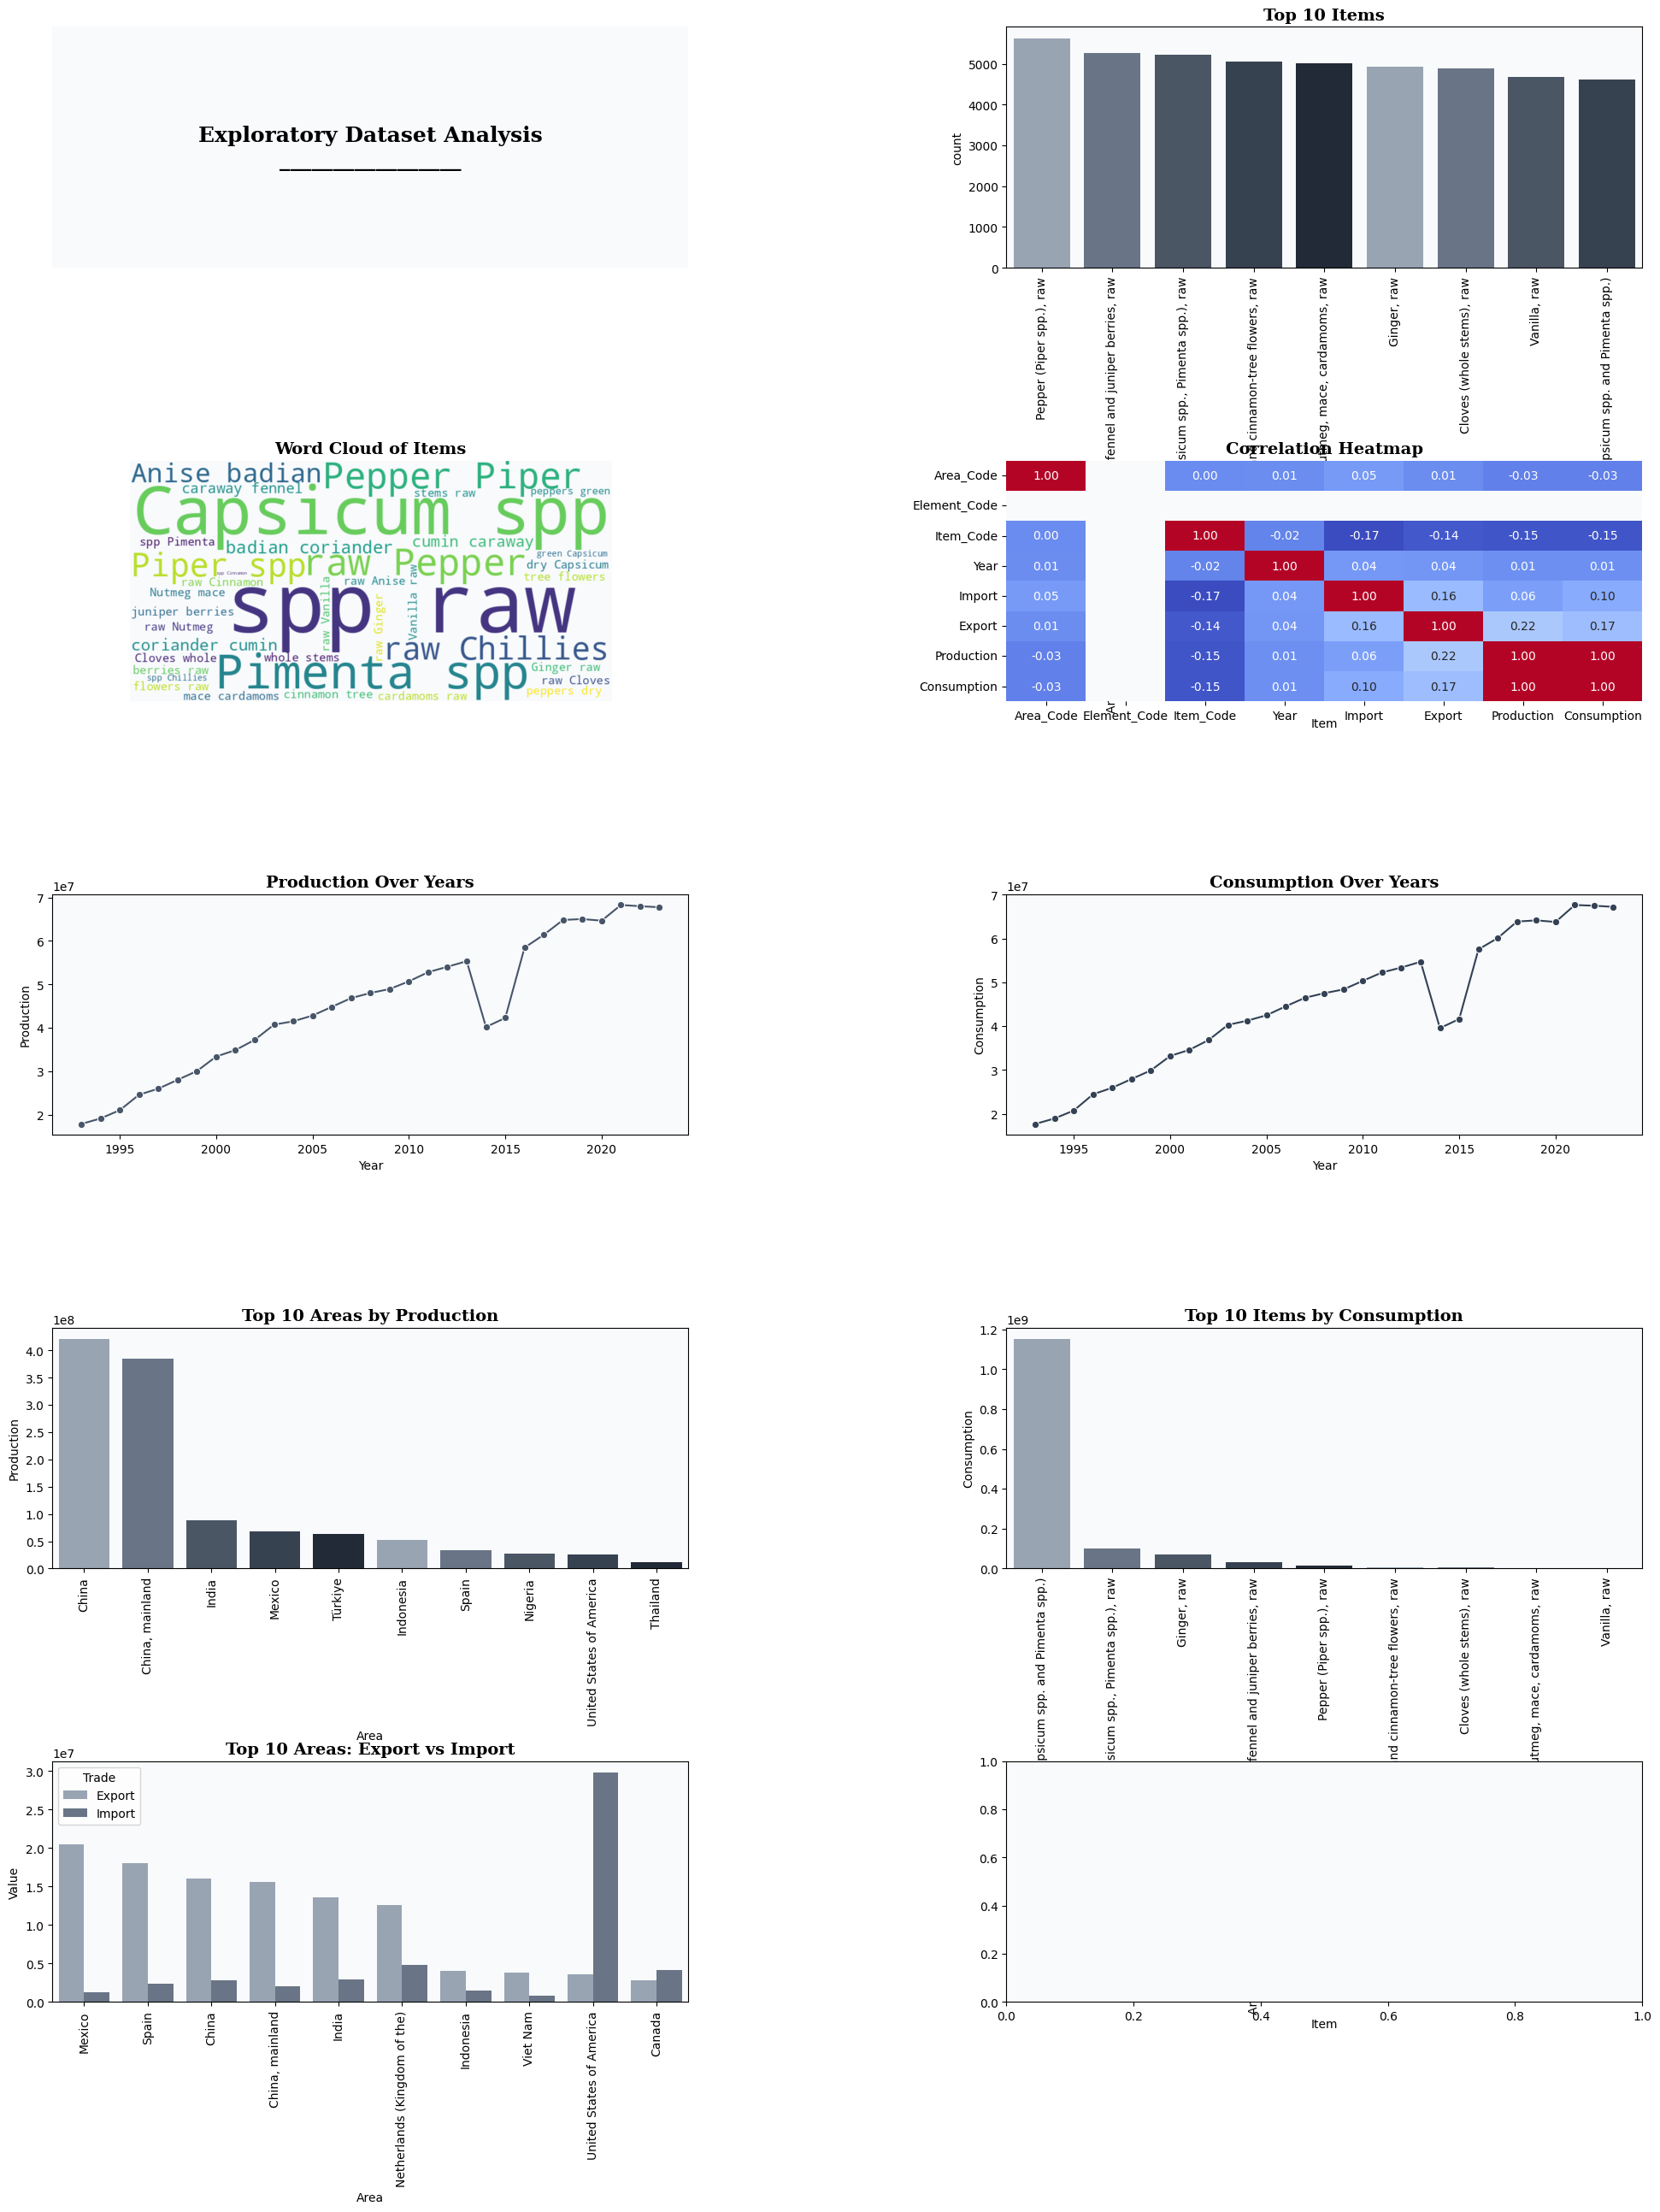

In [15]:
# General plot settings
background_color = "#f8fafc"  
color_palette = ["#94a3b8", "#64748b", "#475569", "#334155", "#1e293b"]  

# Adjust figure size and layout
fig = plt.figure(figsize=(24, 30))  
gs = fig.add_gridspec(5, 2)  
gs.update(wspace=0.5, hspace=0.8)  

# Create axes for subplots
axes = [fig.add_subplot(gs[i, j]) for i in range(5) for j in range(2)]
for ax in axes:
    ax.set_facecolor(background_color)  

# Title for the overall analysis
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Exploratory Dataset Analysis\n_________________',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif',
             color="#000000")

# 1. Count plot for Item distribution
if 'Item' in data.columns:
    sns.countplot(ax=axes[1], data=data, x='Item', palette=color_palette, order=data['Item'].value_counts().iloc[:10].index)
    axes[1].set_title('Top 10 Items', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    axes[1].tick_params(axis='x', rotation=90)

# 2. Word cloud of Items
if 'Item' in data.columns:
    text = " ".join(data['Item'].astype(str))
    wordcloud = WordCloud(background_color=background_color, width=800, height=400).generate(text)
    axes[2].imshow(wordcloud, interpolation='bilinear')
    axes[2].axis('off')
    axes[2].set_title('Word Cloud of Items', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")

# 3. Correlation heatmap
numeric_data = data.select_dtypes(include=[np.number])
if not numeric_data.empty:
    corr_matrix = numeric_data.corr()
    sns.heatmap(corr_matrix, ax=axes[3], annot=True, fmt='.2f', cmap='coolwarm', cbar=False)
    axes[3].set_title('Correlation Heatmap', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")

# 4. Production over time
if 'Year' in data.columns and 'Production' in data.columns:
    prod_year = data.groupby('Year')['Production'].sum().reset_index()
    sns.lineplot(ax=axes[4], data=prod_year, x='Year', y='Production', marker='o', color=color_palette[2])
    axes[4].set_title('Production Over Years', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")

# 5. Consumption over time
if 'Year' in data.columns and 'Consumption' in data.columns:
    cons_year = data.groupby('Year')['Consumption'].sum().reset_index()
    sns.lineplot(ax=axes[5], data=cons_year, x='Year', y='Consumption', marker='o', color=color_palette[3])
    axes[5].set_title('Consumption Over Years', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")

# 6. Top Areas by Production
if 'Area' in data.columns and 'Production' in data.columns:
    top_areas = data.groupby('Area')['Production'].sum().nlargest(10).reset_index()
    sns.barplot(ax=axes[6], data=top_areas, x='Area', y='Production', palette=color_palette)
    axes[6].set_title('Top 10 Areas by Production', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    axes[6].tick_params(axis='x', rotation=90)

# 7. Top Items by Consumption
if 'Item' in data.columns and 'Consumption' in data.columns:
    top_items = data.groupby('Item')['Consumption'].sum().nlargest(10).reset_index()
    sns.barplot(ax=axes[7], data=top_items, x='Item', y='Consumption', palette=color_palette)
    axes[7].set_title('Top 10 Items by Consumption', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    axes[7].tick_params(axis='x', rotation=90)

# 8. Export vs Import by Area
if 'Area' in data.columns and 'Export' in data.columns and 'Import' in data.columns:
    area_trade = data.groupby('Area')[['Export', 'Import']].sum().nlargest(10, 'Export').reset_index()
    area_trade = area_trade.melt(id_vars='Area', value_vars=['Export', 'Import'], var_name='Trade', value_name='Value')
    sns.barplot(ax=axes[8], data=area_trade, x='Area', y='Value', hue='Trade', palette=color_palette[:2])
    axes[8].set_title('Top 10 Areas: Export vs Import', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    axes[8].tick_params(axis='x', rotation=90)

# Show the plots
plt.tight_layout()
plt.show()


Gradient Boosting Regressor Metrics:
  - Mean Squared Error (MSE): 5475812341.004051
  - R-squared (R2): 0.974298


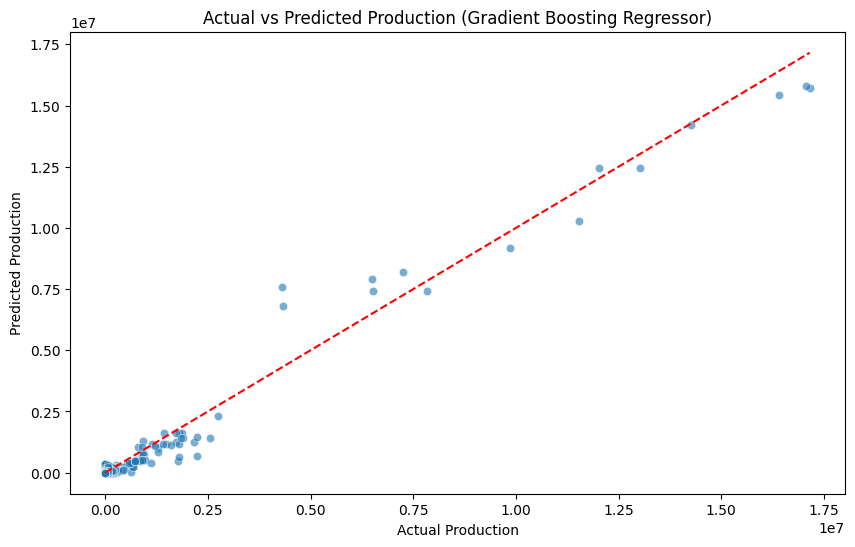

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 36256, number of used features: 209
[LightGBM] [Info] Start training from score 31198.676325
LightGBM Regressor Metrics:
  - Mean Squared Error (MSE): 28724346860.770027
  - R-squared (R2): 0.865177


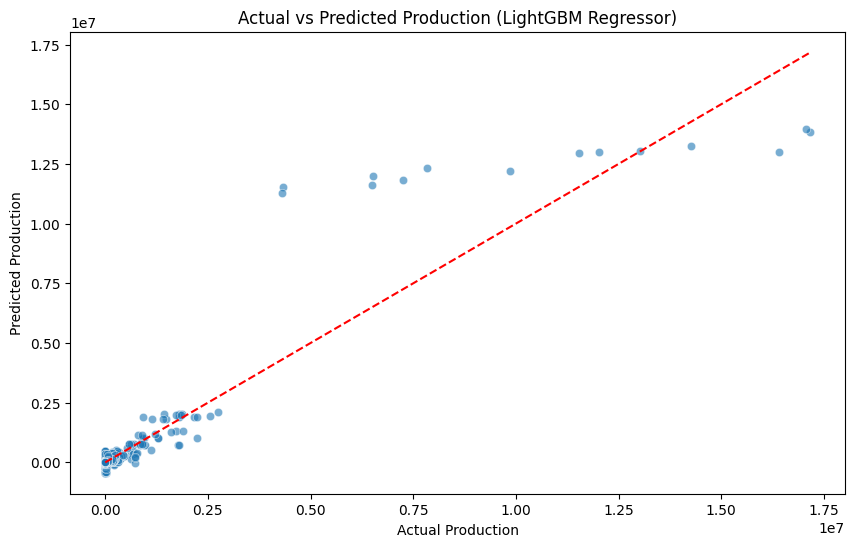

Neural Network Regressor Metrics:
  - Mean Squared Error (MSE): 1764941354.115617
  - R-squared (R2): 0.991716


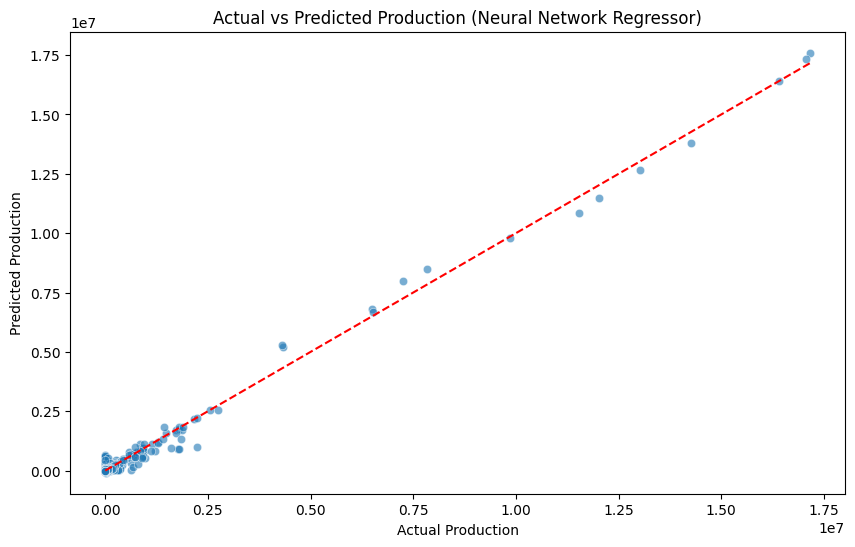

Gradient Boosting Regressor Cross-Validation:
  - Mean Squared Error (MSE): 247075227199.355469 (+/- 463914225914.961731)
  - R-squared (R2): 0.018399 (+/- 0.055717)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 36256, number of used features: 170
[LightGBM] [Info] Start training from score 15130.576320
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 36257, number of used features: 170
[LightGBM] [Info] Start training from score 37574.837469
[LightGBM] [In

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Function to evaluate regression models
def evaluate_regression_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"  - Mean Squared Error (MSE): {mse:.6f}")
    print(f"  - R-squared (R2): {r2:.6f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.xlabel('Actual Production')
    plt.ylabel('Predicted Production')
    plt.title(f'Actual vs Predicted Production ({model_name})')
    plt.show()

# Step 1: Feature selection
# Drop rows with missing values in critical columns
model_data = data.dropna(subset=['Production', 'Item', 'Area', 'Year'])

# Define features and target
features = ['Item', 'Area', 'Year']
target = 'Production'

X = model_data[features]
y = model_data[target]

# Step 2: Preprocessing
categorical_features = ['Item', 'Area']
numerical_features = ['Year']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Step 3: Train and evaluate models
gbm_model = GradientBoostingRegressor(random_state=42)
evaluate_regression_model(gbm_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test, "Gradient Boosting Regressor")

lgb_model = lgb.LGBMRegressor(random_state=42)
evaluate_regression_model(lgb_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test, "LightGBM Regressor")

mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
evaluate_regression_model(mlp_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test, "Neural Network Regressor")

# Step 4: Cross-validation comparison
models = {
    "Gradient Boosting Regressor": gbm_model,
    "LightGBM Regressor": lgb_model,
    "Neural Network Regressor": mlp_model
}

for name, model in models.items():
    cv_scores_mse = -cross_val_score(model, preprocessor.transform(X), y, cv=5, scoring='neg_mean_squared_error')
    cv_scores_r2 = cross_val_score(model, preprocessor.transform(X), y, cv=5, scoring='r2')

    print(f"{name} Cross-Validation:")
    print(f"  - Mean Squared Error (MSE): {cv_scores_mse.mean():.6f} (+/- {cv_scores_mse.std():.6f})")
    print(f"  - R-squared (R2): {cv_scores_r2.mean():.6f} (+/- {cv_scores_r2.std():.6f})")